# **Analyzing User Fitness Based on Tracker Data**

## Overview:
This case study delves into the data of individuals who used the Bellabeat tracker for an entire month, aiming to gain valuable insights into their activity and fitness patterns. Through thorough data exploration and insightful visualizations, several key findings have emerged, shedding light on the users' behaviors and the tracker's effectiveness.

In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

from pandas.api.types import CategoricalDtype

## Pepraing the Dataset for analysis

In [2]:
#importing the file for the analysis
df = pd.read_csv('dailyActivity_merged.csv')
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [3]:
df.shape

(940, 15)

In [4]:
df.columns


Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [5]:
df.dtypes # to see the datatypes


Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [6]:
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'],format="%m/%d/%Y")# changed the  dtype of ActivityDate from object to datetime format
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [7]:
df['ActivityDate'] = df['ActivityDate'].dt.strftime('%d-%m-%Y') # changed the date format into d/m/y format

In [8]:
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']
df['TotalHours'] = df['TotalMinutes'] / 60
df['Total_ActiveMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] 
df['Total_ActiveHours'] = df['Total_ActiveMinutes'] / 60
df['Total_Sedentaryhours']=df['SedentaryMinutes'] / 60

In [9]:
df['Id'].value_counts() #finding how many entries that every ID have

1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: Id, dtype: int64

In [10]:
df['person']=df['Id']

In [11]:
column_data = df['person'] # checking whether new coulumn has inherited the id's
print(column_data)

0      1503960366
1      1503960366
2      1503960366
3      1503960366
4      1503960366
          ...    
935    8877689391
936    8877689391
937    8877689391
938    8877689391
939    8877689391
Name: person, Length: 940, dtype: object


In [12]:
df['person'].replace(
{'1503960366':'person_1',
'4319703577' :'person_2',  
'8583815059' :'person_3',   
'8378563200' :'person_4',  
'8053475328' :'person_5',   
'7086361926' :'person_6',   
'6962181067' :'person_7',  
'5553957443' :'person_8',  
'4702921684' :'person_9',  
'4558609924' :'person_10',   
'1624580081' :'person_11',   
'4388161847' :'person_12',   
'4445114986' :'person_13',   
'8877689391' :'person_14',   
'1927972279' :'person_15',   
'2873212765' :'person_16',   
'2320127002' :'person_17',   
'4020332650' :'person_18',   
'2026352035':'person_19',   
'1844505072':'person_20',   
'2022484408' :'person_21',   
'3977333714' :'person_22',   
'1644430081':'person_23',   
'5577150313' :'person_24',   
'8792009665' :'person_25',   
'6290855005' :'person_26',  
'6117666160' :'person_27',   
'6775888955' :'person_28',  
'7007744171' :'person_29',   
'3372868164' :'person_30',   
'8253242879' :'person_31',   
'2347167796' :'person_32',  
'4057192912' :'person_33'    }, inplace=True)#assigning names to ID's

In [13]:
df['person']

0       person_1
1       person_1
2       person_1
3       person_1
4       person_1
         ...    
935    person_14
936    person_14
937    person_14
938    person_14
939    person_14
Name: person, Length: 940, dtype: object

In [14]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,Total_ActiveMinutes,Total_ActiveHours,Total_Sedentaryhours,person
0,1503960366,12-04-2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,...,13,328,728,1985,1094,18.233333,366,6.100000,12.133333,person_1
1,1503960366,13-04-2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,...,19,217,776,1797,1033,17.216667,257,4.283333,12.933333,person_1
2,1503960366,14-04-2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,...,11,181,1218,1776,1440,24.000000,222,3.700000,20.300000,person_1
3,1503960366,15-04-2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,...,34,209,726,1745,998,16.633333,272,4.533333,12.100000,person_1
4,1503960366,16-04-2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,...,10,221,773,1863,1040,17.333333,267,4.450000,12.883333,person_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,08-05-2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,4,245,1174,2847,1440,24.000000,266,4.433333,19.566667,person_14
936,8877689391,09-05-2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,19,217,1131,3710,1440,24.000000,309,5.150000,18.850000,person_14
937,8877689391,10-05-2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,11,224,1187,2832,1440,24.000000,253,4.216667,19.783333,person_14
938,8877689391,11-05-2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,12,213,1127,3832,1440,24.000000,313,5.216667,18.783333,person_14


In [15]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'TotalMinutes',
       'TotalHours', 'Total_ActiveMinutes', 'Total_ActiveHours',
       'Total_Sedentaryhours', 'person'],
      dtype='object')

In [16]:
df.isnull().sum() # checking  for null values

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
TotalMinutes                0
TotalHours                  0
Total_ActiveMinutes         0
Total_ActiveHours           0
Total_Sedentaryhours        0
person                      0
dtype: int64

In [17]:
df.duplicated().sum() # checking duplicates ie an entire record is being duplicatted or not

0

## Analysis

In [18]:
#colums that we are going to use for analysis
df_subset =df[
       ['Id', 'person','ActivityDate', 'TotalSteps', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes','TotalMinutes',
       'TotalHours','Total_ActiveMinutes', 'Total_ActiveHours','Total_Sedentaryhours', 'Calories'
        #'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance',ModeratelyActiveDistance', 'LightActiveDistance','SedentaryActiveDistance','SedentaryActiveDistance',
         ]]

In [19]:
df_subset # creaating a subset for analysis

,Id,person,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,TotalHours,Total_ActiveMinutes,Total_ActiveHours,Total_Sedentaryhours,Calories
0,1503960366,person_1,12-04-2016,13162,25,13,328,728,1094,18.233333,366,6.100000,12.133333,1985
1,1503960366,person_1,13-04-2016,10735,21,19,217,776,1033,17.216667,257,4.283333,12.933333,1797
2,1503960366,person_1,14-04-2016,10460,30,11,181,1218,1440,24.000000,222,3.700000,20.300000,1776
3,1503960366,person_1,15-04-2016,9762,29,34,209,726,998,16.633333,272,4.533333,12.100000,1745
4,1503960366,person_1,16-04-2016,12669,36,10,221,773,1040,17.333333,267,4.450000,12.883333,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,person_14,08-05-2016,10686,17,4,245,1174,1440,24.000000,266,4.433333,19.566667,2847
936,8877689391,person_14,09-05-2016,20226,73,19,217,1131,1440,24.000000,309,5.150000,18.850000,3710
937,8877689391,person_14,10-05-2016,10733,18,11,224,1187,1440,24.000000,253,4.216667,19.783333,2832
938,8877689391,person_14,11-05-2016,21420,88,12,213,1127,1440,24.000000,313,5.216667,18.783333,3832


In [20]:
# grouping the data by the person
person_grp = df_subset.groupby(['person'])

# Calculating average amount of steps, and sort the results in descending order
person_avg_step = person_grp['TotalSteps'].mean().sort_values(ascending=False)

#results into a dataframe
person_avg_step = person_avg_step.to_frame()
person_avg_step




,TotalSteps
person,
person_14,16040.032258
person_5,14763.290323
person_1,12116.741935
person_21,11370.645161
person_29,11323.423077
person_22,10984.566667
person_12,10813.935484
person_7,9794.806452
person_32,9519.666667


In [21]:



# creating a new column which tells in which category each user fits into, depending on the average amount of steps
conditions = [
    (person_avg_step <=6000),
    (person_avg_step > 6000) & (person_avg_step < 12000),
    (person_avg_step >= 12000)
] # These are the conditions

values = ['sedentary','active','very_active']
person_avg_step['activity_level'] = np.select(conditions,values)# And here are the name of the values

person_avg_step

#person_activity_level = person_avg_step['activity_level']
#df['activity_level'] = [person_activity_level[c] for c in df['person']]
#df




,TotalSteps,activity_level
person,,
person_14,16040.032258,very_active
person_5,14763.290323,very_active
person_1,12116.741935,very_active
person_21,11370.645161,active
person_29,11323.423077,active
person_22,10984.566667,active
person_12,10813.935484,active
person_7,9794.806452,active
person_32,9519.666667,active


In [22]:
person_grp = df_subset.groupby(['person'])

# Calculating average amount of hrs user was wearing the bellabeat tracker
person_avg_time = person_grp['TotalHours'].mean().sort_values(ascending=False)

#results into a dataframe
person_avg_time = person_avg_time.to_frame()
person_avg_time

,TotalHours
person,
person_31,23.985088
person_3,23.956452
person_26,23.783908
person_11,23.761828
person_21,23.761290
person_16,23.756989
person_14,23.726344
person_17,23.703763
person_30,23.645000


In [23]:
conditions = [
    (person_avg_time <=8),
    (person_avg_time > 8) & (person_avg_time < 16),
    (person_avg_time >= 16)
] # These are the conditions

values = ['low','normal','high']
person_avg_time['tracker_usage'] = np.select(conditions,values)# And here are the name of the values
person_avg_time

#person_tracker_usage= person_avg_time['tracker_usage']
#df['tracker_usage'] = [person_tracker_usage[c] for c in df['person']]
#df

,TotalHours,tracker_usage
person,,
person_31,23.985088,high
person_3,23.956452,high
person_26,23.783908,high
person_11,23.761828,high
person_21,23.761290,high
person_16,23.756989,high
person_14,23.726344,high
person_17,23.703763,high
person_30,23.645000,high


In [24]:
person_grp = df_subset.groupby(['person'])

person_avg_ActiveMinutes = person_grp['Total_ActiveMinutes'].mean()
person_avg_ActiveHours = person_grp['Total_ActiveHours'].mean()
person_avg_SedentryHours =person_grp['Total_Sedentaryhours'].mean()

# Combine the results into a single DataFrame
person_avg_combined = pd.DataFrame({
    'Average_ActiveMinutes': person_avg_ActiveMinutes,
    'Average_ActiveHours': person_avg_ActiveHours,
    'Average_SedentryHours':person_avg_SedentryHours
})

# Sort the DataFrame by Average_ActiveMinutes in descending order
person_avg_timecombined = person_avg_combined.sort_values(by='Average_ActiveMinutes', ascending=False)
person_avg_timecombined


,Average_ActiveMinutes,Average_ActiveHours,Average_SedentryHours
person,,,
person_30,341.150000,5.685833,17.959167
person_16,328.225806,5.470430,18.286559
person_29,328.038462,5.467308,17.589103
person_21,313.096774,5.218280,18.543011
person_14,310.709677,5.178495,18.547849
person_10,309.064516,5.151075,18.226882
person_27,291.964286,4.866071,13.271429
person_7,287.129032,4.785484,11.038710
person_32,286.555556,4.775926,11.452778


In [25]:
df_subset['person'].value_counts() # To see how may days the person was using the tracker 

person_1     31
person_2     31
person_3     31
person_4     31
person_5     31
person_6     31
person_7     31
person_8     31
person_9     31
person_10    31
person_11    31
person_12    31
person_13    31
person_14    31
person_15    31
person_16    31
person_17    31
person_18    31
person_19    31
person_20    31
person_21    31
person_22    30
person_23    30
person_24    30
person_25    29
person_26    29
person_27    28
person_28    26
person_29    26
person_30    20
person_31    19
person_32    18
person_33     4
Name: person, dtype: int64

In [26]:
person_avg_calories_burned = person_grp['Calories'].mean().sort_values(ascending=False)

#results into a dataframe
person_avg_calories_burned = person_avg_calories_burned.to_frame()
person_avg_calories_burned


,Calories
person,
person_4,3436.580645
person_14,3420.258065
person_24,3359.633333
person_12,3093.870968
person_9,2965.548387
person_5,2945.806452
person_23,2811.300000
person_3,2732.032258
person_26,2599.620690


In [27]:
#joining the individually formed columns after anlysis from the subset and joining it to main dataset
person_activity_level = person_avg_step['activity_level']
df['activity_level'] = [person_activity_level[c] for c in df['person']]
person_tracker_usage= person_avg_time['tracker_usage']
df['tracker_usage'] = [person_tracker_usage[c] for c in df['person']]
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,SedentaryMinutes,Calories,TotalMinutes,TotalHours,Total_ActiveMinutes,Total_ActiveHours,Total_Sedentaryhours,person,activity_level,tracker_usage
0,1503960366,12-04-2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,...,728,1985,1094,18.233333,366,6.100000,12.133333,person_1,very_active,high
1,1503960366,13-04-2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,...,776,1797,1033,17.216667,257,4.283333,12.933333,person_1,very_active,high
2,1503960366,14-04-2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,...,1218,1776,1440,24.000000,222,3.700000,20.300000,person_1,very_active,high
3,1503960366,15-04-2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,...,726,1745,998,16.633333,272,4.533333,12.100000,person_1,very_active,high
4,1503960366,16-04-2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,...,773,1863,1040,17.333333,267,4.450000,12.883333,person_1,very_active,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,08-05-2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,1174,2847,1440,24.000000,266,4.433333,19.566667,person_14,very_active,high
936,8877689391,09-05-2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,1131,3710,1440,24.000000,309,5.150000,18.850000,person_14,very_active,high
937,8877689391,10-05-2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,1187,2832,1440,24.000000,253,4.216667,19.783333,person_14,very_active,high
938,8877689391,11-05-2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,1127,3832,1440,24.000000,313,5.216667,18.783333,person_14,very_active,high


In [28]:
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'],format="%d-%m-%Y")# changed the  dtype of ActivityDate from object to datetime format

df['day_of_week'] = df['ActivityDate'].dt.day_name()


df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
TotalMinutes                         int64
TotalHours                         float64
Total_ActiveMinutes                  int64
Total_ActiveHours                  float64
Total_Sedentaryhours               float64
person                              object
activity_level                      object
tracker_usage                       object
day_of_week

In [29]:
df.head(2)
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'TotalMinutes',
       'TotalHours', 'Total_ActiveMinutes', 'Total_ActiveHours',
       'Total_Sedentaryhours', 'person', 'activity_level', 'tracker_usage',
       'day_of_week'],
      dtype='object')

In [32]:
Table_1 = pd.merge(person_avg_step, person_avg_time, on='person', how='outer')
Table_1= pd.merge(Table_1,person_avg_calories_burned , on='person', how='inner')
Table_1= pd.merge(Table_1,person_avg_timecombined , on='person', how='inner')
Table_1

,TotalSteps,activity_level,TotalHours,tracker_usage,Calories,Average_ActiveMinutes,Average_ActiveHours,Average_SedentryHours
person,,,,,,,,
person_14,16040.032258,very_active,23.726344,high,3420.258065,310.709677,5.178495,18.547849
person_5,14763.290323,very_active,23.228495,high,2945.806452,245.709677,4.095161,19.133333
person_1,12116.741935,very_active,18.766129,high,1816.419355,277.806452,4.630108,14.136022
person_21,11370.645161,active,23.761290,high,2509.967742,313.096774,5.218280,18.543011
person_29,11323.423077,active,23.056410,high,2544.000000,328.038462,5.467308,17.589103
person_22,10984.566667,active,16.041111,high,1513.666667,254.933333,4.248889,11.792222
person_12,10813.935484,active,18.492473,high,3093.870968,272.870968,4.547849,13.944624
person_7,9794.806452,active,15.824194,normal,1982.032258,287.129032,4.785484,11.038710
person_32,9519.666667,active,16.228704,high,2043.444444,286.555556,4.775926,11.452778


In [33]:
name_mapping = {
    'TotalSteps': 'AVG_TotalSteps',
    'TotalHours': 'AVG_TotalHours',
    'activity_level':'Overall_activity_level',
    'tracker_usage':'Overall_tracker_usage',
    'Calories':'AVG_Caloriesburned'
}

# Using  the replace() method to rename column values
Table_1.rename(columns=name_mapping, inplace=True)
Table_1


,AVG_TotalSteps,Overall_activity_level,AVG_TotalHours,Overall_tracker_usage,AVG_Caloriesburned,Average_ActiveMinutes,Average_ActiveHours,Average_SedentryHours
person,,,,,,,,
person_14,16040.032258,very_active,23.726344,high,3420.258065,310.709677,5.178495,18.547849
person_5,14763.290323,very_active,23.228495,high,2945.806452,245.709677,4.095161,19.133333
person_1,12116.741935,very_active,18.766129,high,1816.419355,277.806452,4.630108,14.136022
person_21,11370.645161,active,23.761290,high,2509.967742,313.096774,5.218280,18.543011
person_29,11323.423077,active,23.056410,high,2544.000000,328.038462,5.467308,17.589103
person_22,10984.566667,active,16.041111,high,1513.666667,254.933333,4.248889,11.792222
person_12,10813.935484,active,18.492473,high,3093.870968,272.870968,4.547849,13.944624
person_7,9794.806452,active,15.824194,normal,1982.032258,287.129032,4.785484,11.038710
person_32,9519.666667,active,16.228704,high,2043.444444,286.555556,4.775926,11.452778


In [34]:
value_counts_series = df_subset['person'].value_counts()

# Convert the value counts series to a DataFrame
Table_2= pd.DataFrame({'person': value_counts_series.index, 'count': value_counts_series.values})

# Display the resulting DataFrame
print(Table_2)

       person  count
0    person_1     31
1    person_2     31
2    person_3     31
3    person_4     31
4    person_5     31
5    person_6     31
6    person_7     31
7    person_8     31
8    person_9     31
9   person_10     31
10  person_11     31
11  person_12     31
12  person_13     31
13  person_14     31
14  person_15     31
15  person_16     31
16  person_17     31
17  person_18     31
18  person_19     31
19  person_20     31
20  person_21     31
21  person_22     30
22  person_23     30
23  person_24     30
24  person_25     29
25  person_26     29
26  person_27     28
27  person_28     26
28  person_29     26
29  person_30     20
30  person_31     19
31  person_32     18
32  person_33      4


In [35]:
name_mapping = {
    'count': 'Total_days_used',
}

# Use the replace() method to rename column values
Table_2.rename(columns=name_mapping, inplace=True)
Table_2


,person,Total_days_used
0,person_1,31
1,person_2,31
2,person_3,31
3,person_4,31
4,person_5,31
5,person_6,31
6,person_7,31
7,person_8,31
8,person_9,31
9,person_10,31


## Creating a summary table 

In [36]:
Table_3 = pd.merge(Table_1, Table_2, on='person', how='inner')
summary = Table_3.sort_values(by=['Total_days_used','AVG_Caloriesburned','Average_ActiveHours'], ascending=[False,False,False])
#summary




# Definining the desired column order
desired_columns = ['person','Total_days_used', 'Overall_activity_level', 'Overall_tracker_usage','AVG_TotalSteps','AVG_TotalHours','Average_ActiveHours','Average_SedentryHours','AVG_Caloriesburned']
summary = summary[desired_columns]
summary







,person,Total_days_used,Overall_activity_level,Overall_tracker_usage,AVG_TotalSteps,AVG_TotalHours,Average_ActiveHours,Average_SedentryHours,AVG_Caloriesburned
10,person_4,31,active,normal,8717.709677,15.686022,3.750538,11.935484,3436.580645
0,person_14,31,very_active,high,16040.032258,23.726344,5.178495,18.547849,3420.258065
6,person_12,31,active,high,10813.935484,18.492473,4.547849,13.944624,3093.870968
12,person_9,31,active,high,8572.064516,17.251075,4.477419,12.773656,2965.548387
1,person_5,31,very_active,high,14763.290323,23.228495,4.095161,19.133333,2945.806452
18,person_3,31,active,high,7198.516129,23.956452,2.836022,21.120430,2732.032258
9,person_6,31,active,high,9371.774194,17.703763,3.529570,14.174194,2566.354839
3,person_21,31,active,high,11370.645161,23.761290,5.218280,18.543011,2509.967742
30,person_18,31,sedentary,high,2267.225806,22.079032,1.458065,20.620968,2385.806452
25,person_13,31,sedentary,high,4796.548387,17.455914,3.624194,13.831720,2186.193548


## Visualizations

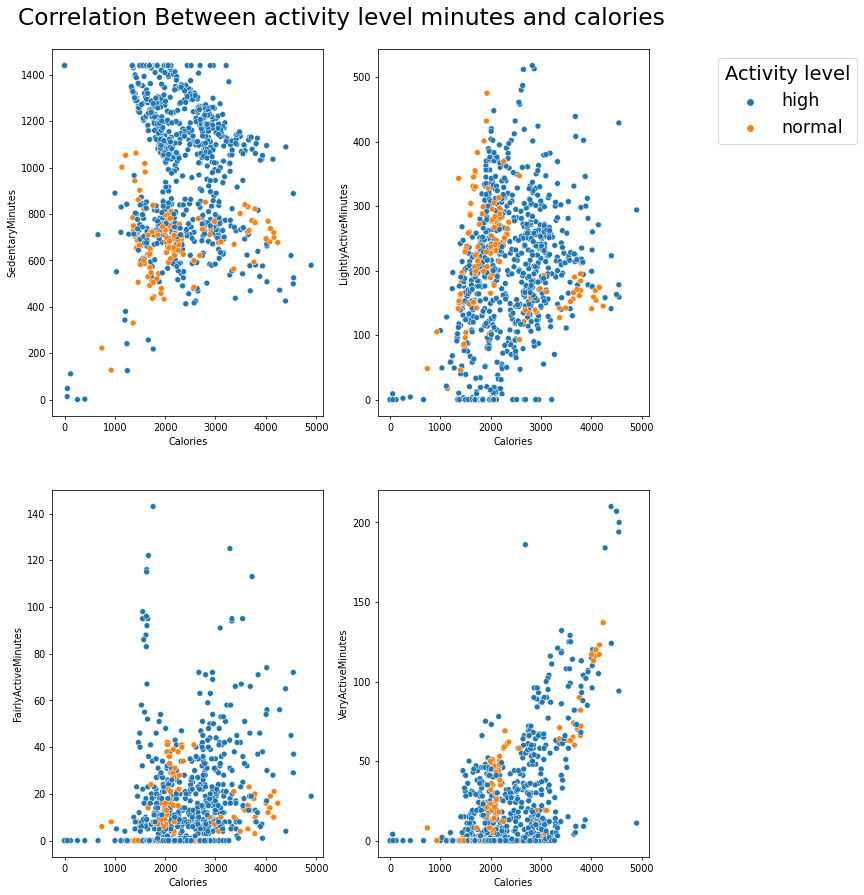

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(11,15),dpi=70)

sns.scatterplot(data=df,x='Calories',y='SedentaryMinutes',hue='tracker_usage',ax=axes[0,0],legend=False)

sns.scatterplot(data=df,x='Calories',y='LightlyActiveMinutes',hue='tracker_usage',ax=axes[0,1],legend=False)

sns.scatterplot(data=df,x='Calories',y='FairlyActiveMinutes',hue='tracker_usage',ax=axes[1,0],legend=False)

sns.scatterplot(data=df,x='Calories',y='VeryActiveMinutes',hue='tracker_usage',ax=axes[1,1])


plt.legend(title='Activity level',title_fontsize=20,bbox_to_anchor=(1.8,2.2),fontsize=18,frameon=True,scatterpoints=1)
fig.suptitle('Correlation Between activity level minutes and calories',x=0.5,y=0.92,fontsize=24)
plt.show()

Correlation between Total_ActiveMinutes and calories: 0.47


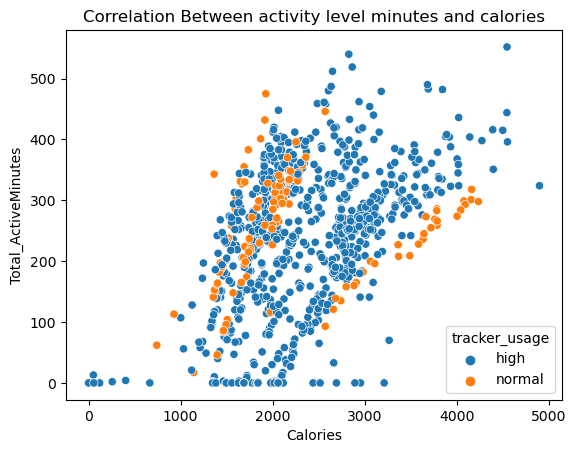

In [ ]:
sns.scatterplot(data=df, y="Total_ActiveMinutes", x="Calories", hue="tracker_usage")

# Calculate the correlation
correlation = df["Total_ActiveMinutes"].corr(df["Calories"])
print(f"Correlation between Total_ActiveMinutes and calories: {correlation:.2f}")

# Show the plot
plt.title('Correlation Between activity level minutes and calories')
plt.xlabel('Calories')
plt.ylabel('Total_ActiveMinutes')
plt.legend(title='tracker_usage', loc='lower right')

plt.show()

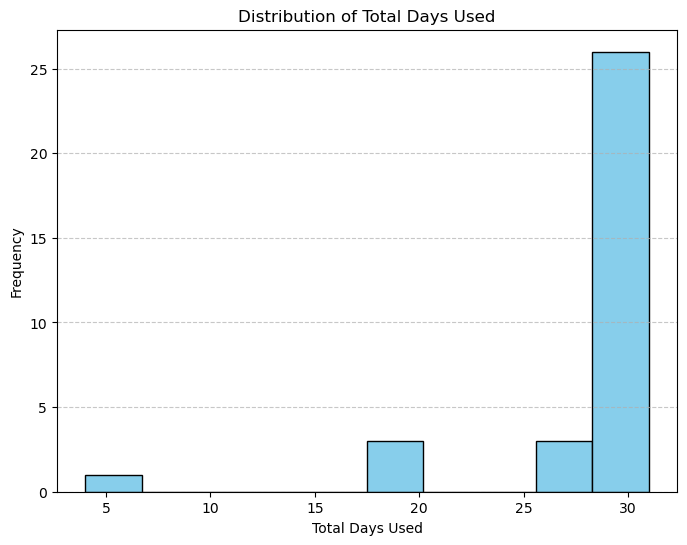

In [37]:
plt.figure(figsize=(8, 6))
plt.hist(summary['Total_days_used'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Days Used')
plt.xlabel('Total Days Used')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()






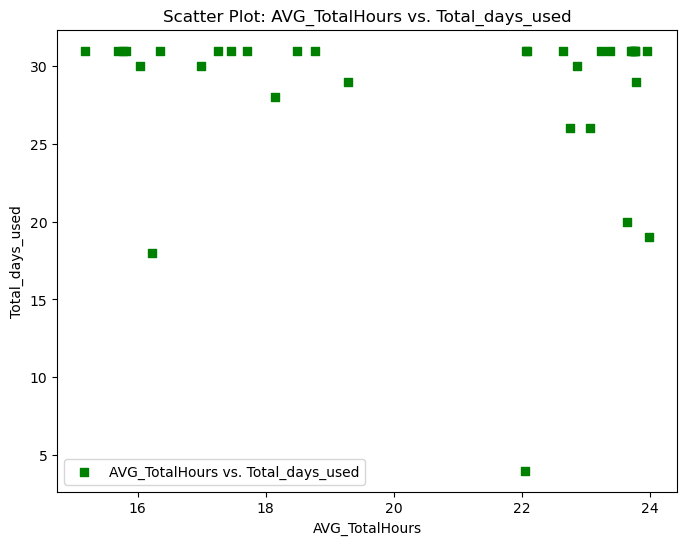

In [38]:
# Create a scatter plot for 'AVG_TotalHours' vs. 'Total_days_used' so that we can eaily see the outliers
plt.figure(figsize=(8, 6))
plt.scatter(summary['AVG_TotalHours'], summary['Total_days_used'], c='green', marker='s', label='AVG_TotalHours vs. Total_days_used')
plt.title('Scatter Plot: AVG_TotalHours vs. Total_days_used')
plt.xlabel('AVG_TotalHours')
plt.ylabel('Total_days_used')
plt.legend()

plt.show()

###### Using this scatter plot, we can identify outliers that might not provide a comprehensive representation of an individual's situation.

In [39]:
#By excluding the outliers, we can conduct a more accurate analysis of the overall metrics for the individuals.


filtered_df = summary[summary['Total_days_used'] == 31]
filtered_df



,person,Total_days_used,Overall_activity_level,Overall_tracker_usage,AVG_TotalSteps,AVG_TotalHours,Average_ActiveHours,Average_SedentryHours,AVG_Caloriesburned
10,person_4,31,active,normal,8717.709677,15.686022,3.750538,11.935484,3436.580645
0,person_14,31,very_active,high,16040.032258,23.726344,5.178495,18.547849,3420.258065
6,person_12,31,active,high,10813.935484,18.492473,4.547849,13.944624,3093.870968
12,person_9,31,active,high,8572.064516,17.251075,4.477419,12.773656,2965.548387
1,person_5,31,very_active,high,14763.290323,23.228495,4.095161,19.133333,2945.806452
18,person_3,31,active,high,7198.516129,23.956452,2.836022,21.120430,2732.032258
9,person_6,31,active,high,9371.774194,17.703763,3.529570,14.174194,2566.354839
3,person_21,31,active,high,11370.645161,23.761290,5.218280,18.543011,2509.967742
30,person_18,31,sedentary,high,2267.225806,22.079032,1.458065,20.620968,2385.806452
25,person_13,31,sedentary,high,4796.548387,17.455914,3.624194,13.831720,2186.193548


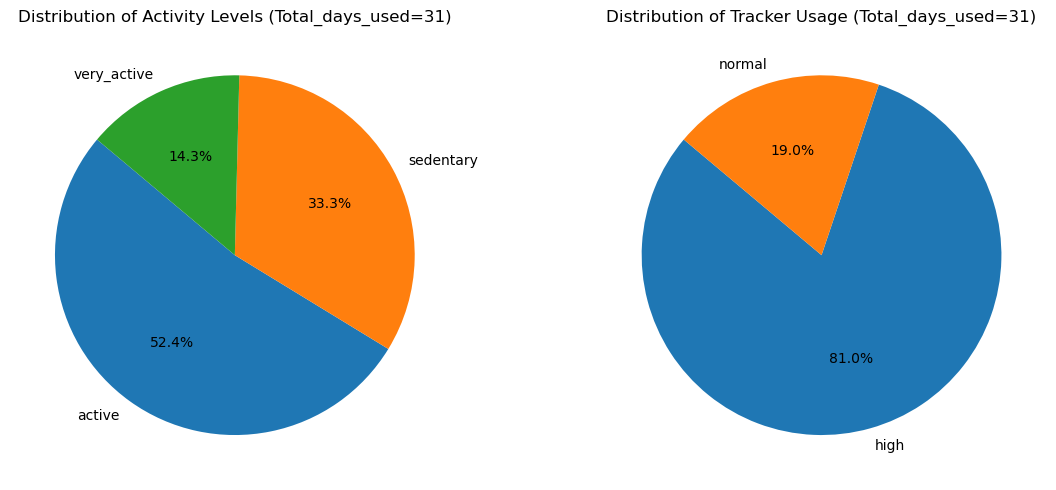

In [40]:
activity_level_counts = filtered_df['Overall_activity_level'].value_counts(normalize=True) * 100

# Calculate the distribution of 'tracker_usage' as percentages
tracker_usage_counts = filtered_df['Overall_tracker_usage'].value_counts(normalize=True) * 100

# Create pie charts for 'activity_level' and 'tracker_usage'
plt.figure(figsize=(12, 5))

# Pie chart for 'activity_level'
plt.subplot(1, 2, 1)
plt.pie(activity_level_counts, labels=activity_level_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Activity Levels (Total_days_used=31)')

# Pie chart for 'tracker_usage'
plt.subplot(1, 2, 2)
plt.pie(tracker_usage_counts, labels=tracker_usage_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tracker Usage (Total_days_used=31)')

plt.tight_layout()
plt.show()

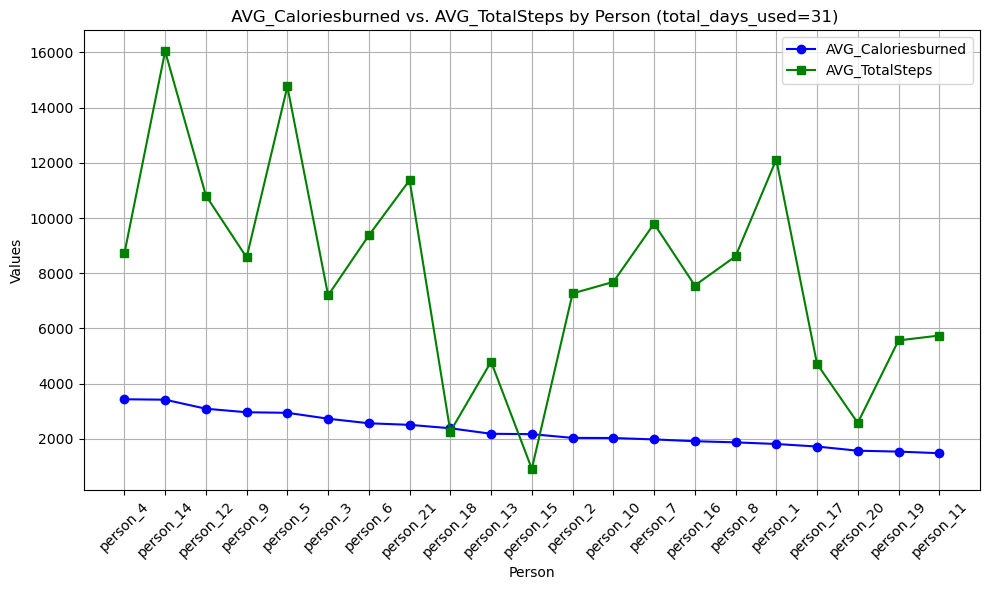

In [41]:
plt.figure(figsize=(10, 6))

# Plot 'AVG_Caloriesburned' with a blue line
plt.plot(filtered_df['person'], filtered_df['AVG_Caloriesburned'], marker='o', color='blue', label='AVG_Caloriesburned', linestyle='-')

# Plot 'AVG_TotalSteps' with a green line
plt.plot(filtered_df['person'], filtered_df['AVG_TotalSteps'], marker='s', color='green', label='AVG_TotalSteps', linestyle='-')

# Set labels and title
plt.xlabel('Person')
plt.ylabel('Values')
plt.title(' AVG_Caloriesburned vs. AVG_TotalSteps by Person (total_days_used=31)')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.grid(True)
plt.tight_layout()
plt.show()

######  Even though the number of steps taken contributes to the calories burned, it is evident from the chart above that it cannot be the sole factor in determining the total calories burned

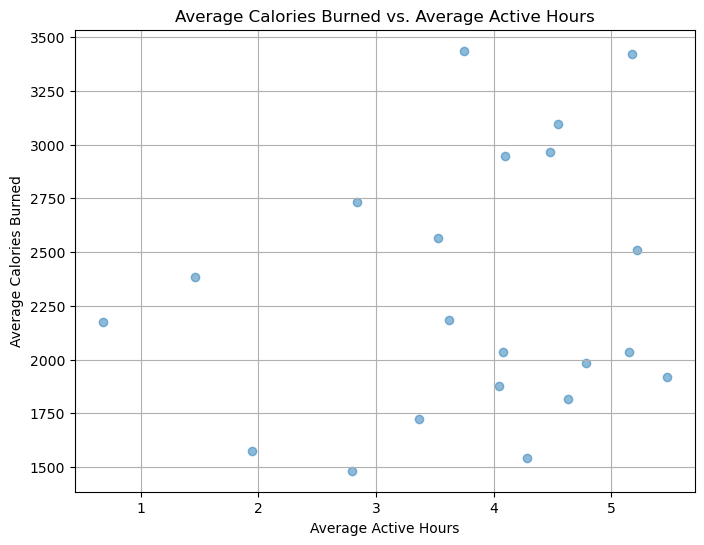

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['Average_ActiveHours'], filtered_df['AVG_Caloriesburned'], alpha=0.5)
plt.title('Average Calories Burned vs. Average Active Hours')
plt.xlabel('Average Active Hours')
plt.ylabel('Average Calories Burned')
plt.grid(True)
plt.show()

In [ ]:
Despite the presence of a positive correlation between average active hours and calories burned, it doesn't hold true in every instance.

# SUMMARY 
The analysis of the dataset consisting of 33 individuals who used the Bellabeat tracker for a complete month revealed valuable insights into their activity and fitness patterns. Through various visualizations and data exploration, several key findings emerged.

 1. High-Calorie Burner - PERSON_4: One standout revelation was that PERSON_4 consistently burned more calories on average throughout the month, suggesting a unique and possibly more active lifestyle compared to others in the dataset.

2. Tracker Usage Duration: It was observed that only 21 out of the 33 individuals in the dataset used the tracker for the complete month, indicating a variance in usage patterns among participants.

3. Active User Demographics: Among those who consistently used the tracker for the entire month, over 50% fell into the "Active" category in terms of their overall activity level, highlighting the tracker's popularity among individuals with an active lifestyle.

4. xtensive Tracker Usage: Furthermore, a substantial majority of 81% among those who consistently utilized the tracker for the entire month were found to use the tracker extensively or in a high manner, suggesting a strong engagement with the device's features.

5. Complex Relationship Between Active Hours and Calories Burned: Although there exists a positive correlation between average active hours and calories burned, it's worth noting that this relationship doesn't hold true in every instance. This complexity adds depth to the analysis, encouraging further exploration into the factors influencing this correlation.

This case study offers valuable insights into how individuals engage with the Bellabeat tracker, their activity levels, and the various patterns that emerge from their data. It underscores the need for a nuanced understanding of user behavior and highlights opportunities for further investigation into the dynamics of activity tracking and fitness monitoring.






